# TP1 : Urgence au bloc opératoire !

L'un des domaines d'applications majeurs du traitement d'images est l'imagerie médicale. A partir de scans du corps humain sous diverses formes, le traitement d'images aide à extraire des informations utiles pour poser un diagnostic. Et c'est ce qu'on va faire aujourd'hui !

Le sujet du jour porte sur l'embolie pulmonaire. Pour cela, nous avons à disposition des scans de poumons, et votre objectif sera de déterminer le rapport entre la surface des vaisseaux et celle des poumons. Si celui-ci est trop élevé, on pourra considérer que le patient a une embolie pulmonaire.

*Note : Je ne suis pas un expert dans le médical, ni même quelqu'un de compétent. Ce TP est un cas exemple. En aucun cas on ne peut réellement déterminer de la pathologie à partir de ce calcul...*

---
## 1) Un peu d'explications du processus de scan du jour

### La tomographie assitée par ordinateur

La tomographie assistée par ordinateur (Computed Tomography en anglais) utilise des faisceaux de rayons X pour obtenir des intensités de pixels en 3D du corps humain. Une cathode chauffée libère des faisceaux à haute énergie (électrons), qui à leur tour libèrent leur énergie sous forme de rayons X. Les rayons X traversent les tissus du corps humain et atteignent un détecteur de l'autre côté. Les tissus denses (par exemple les os) absorbent plus de rayons que les tissus mous (par exemple la graisse). Lorsque les rayons X ne sont pas absorbés par le corps (c'est-à-dire dans la région de l'air à l'intérieur des poumons) et qu'ils atteignent le détecteur, ils apparaissent en noir, comme un film noir. À l'inverse, les tissus denses sont représentés en blanc.

L'imagerie par tomographie est ainsi capable de distinguer les différences de densité et de créer une image en 3D du corps.

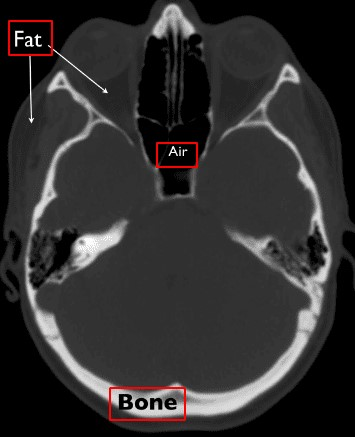

---
### Intensité des rayons X et unités Hounsfield
L'absorption des rayons X est mesurée selon l'échelle de Hounsfield. Dans cette échelle, l'intensité de l'air est fixée à -1000 et celle de l'eau à 0. Il est essentiel de comprendre que l'échelle de Hounsfield est une échelle absolue, contrairement à l'IRM où nous avons une échelle relative de 0 à 255.

L'image illustre certains des tissus de base et leurs valeurs d'intensité correspondantes. N'oubliez pas que les images sont bruitées. Les chiffres peuvent varier légèrement dans les images réelles.

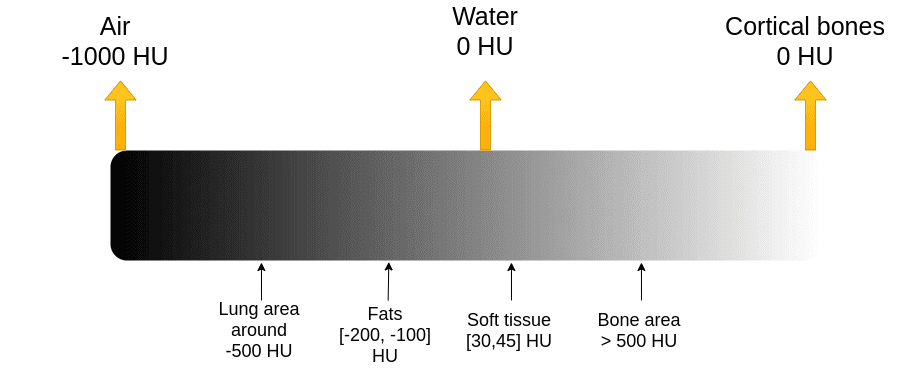

Les os ont une intensité élevée. Nous découpons généralement l'image de manière à ce qu'elle ait une valeur maximale supérieure. Par exemple, la valeur maximale peut être de 1000, pour des raisons pratiques.

Le problème : les bibliothèques de visualisation travaillent sur l'échelle [0,255]. Il ne serait pas très judicieux de visualiser toute l'échelle de Hounsfield (de -1000 à 1000+ ) à 256 échelles pour le diagnostic médical.

Au lieu de cela, nous limitons notre attention à différentes parties de cette échelle et nous nous concentrons sur les tissus sous-jacents.

---
### Visualisation des données de tomographie

La convention d'image médicale pour découper la gamme Housenfield consiste à choisir une intensité centrale, appelée niveau (level), et une fenêtre (window), comme illustré :

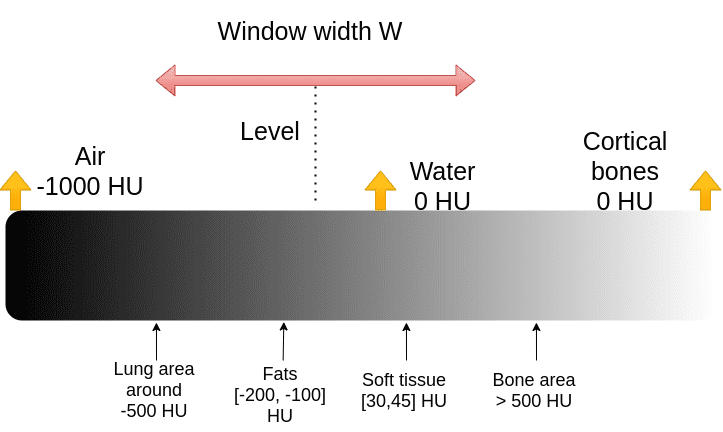

A partir du niveau et de la fenêtre, on définit ainsi une range min/max de valeurs de la manière suivante : 

$min = level - \frac{window}{2}$

$max = level + \frac{window}{2}$

En fonction des niveaux et fenêtres, on obtient à partir du même scan des images totalement différentes. Voici un tableau avec plusieurs ranges de visualisation en fonction des zones que l'on souhaite observer : 

| Region  | Fenêtre | Niveau |
|:--------|:--------|:-------|
| Cerveau | 80      | 40     |
| Poumons | 1500    | -600   |
| Foie    | 150     | 30     |
| Tissus  | 250     | 50     |
| Os      | 1800    | 40     |

---
## 2) Allez, c'est parti, on code

A vos claviers ! On commence tranquillement avec de la visualisation des données.

### Visualisation des données

Vu que les images sont dans un format assez particulier, le code suivant permettra de charger les données pour les avoir sous format "image".

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2

path = './Images/slice017.nii.gz'

ct_scan = nib.load(path)
ct_img = np.flip(ct_scan.get_fdata(),axis=1).T

**1)** Quelles sont les dimensions de l'image ? Quelle est la range de valeurs de l'image ? Quel est le type de données de l'image ?

In [2]:
print("Dimensions de l'image : {}".format(ct_img.shape))
print("Range de l'image : [{},{}]".format(ct_img.min(),ct_img.max()))
print("Type de données de l'image : {}".format(ct_img.dtype))

Dimensions de l'image : (512, 512)
Range de l'image : [-1024.0,1554.0]
Type de données de l'image : float64


**_Réponse_ :** Les réponses aux questions sont affichées juste au-dessus

**2)** Affichez l'image en niveaux de gris. Quelle est la range affichée ?

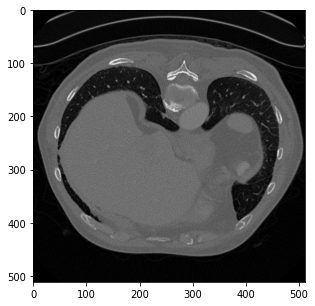

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(ct_img,'gray')
plt.show()

**_Réponse_ :** La range affichée est [-1024, 1554]. Ces valeurs sont normalisées entre 0 et 255 avant l'affichage.

**3)** Codez une fonction qui permettra de normaliser le scan selon une range définie via une fenêtre et un niveau. L'image retournée sera de type uint8 (valeurs entières entre 0 et 255). Testez ensuite votre fonction pour la visualisation des poumons (niveau = 200, fenêtre = 2000) et des tissus (niveau = 50, fenêtre = 350) et affichez le résultat. Que constatez vous ?

In [4]:
def norm_slice(img, level, window):
    img_max = level + window/2
    img_min = level - window/2
    clip_img = np.clip(img, img_min, img_max)
    return (255*(clip_img-img_min)/(img_max-img_min)).astype(np.uint8)

Affichage du scan dans la range de visualisation du poumon


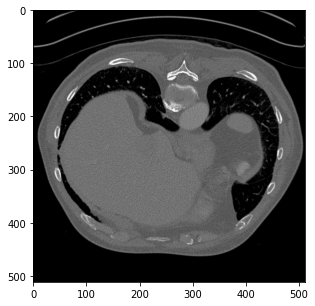

In [5]:
print("Affichage du scan dans la range de visualisation du poumon")
lung_img = norm_slice(ct_img,200,2000)
plt.figure(figsize=(5,5))
plt.imshow(lung_img,'gray')
plt.show()

Affichage du scan dans la range de visualisation des tissus


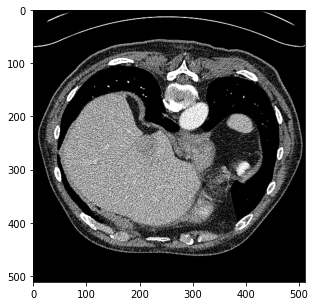

In [6]:
print("Affichage du scan dans la range de visualisation des tissus")
tissu_img = norm_slice(ct_img,50,350)
plt.figure(figsize=(5,5))
plt.imshow(tissu_img,'gray')
plt.show()

**_Réponse :_** On obtient des images totalement différentes avec les différentes ranges de visualisation. On voit par exemple sur l'image des tissus des zones plus contrastées contrairement à l'image des poumons. A l'inverse, sur l'image de poumons, les poumons sont beaucoup plus sombres que tout le reste de l'image, ce qui fait qu'ils sont plus facilement détectables.

---
### Segmentation du poumon

On attaque la grosse partie du TP : la segmentation du poumon. Pas de soucis, on va faire ça étape par étape.

**1)** Développez une fonction de binariastion de l'image de scan pour distinguer les poumons du reste. Pour cela, vous utiliserez l'image dans la range de visualisation [-1000,-300]. A vous de déterminer la fenêtre, le niveau et le seuil de binarisation.

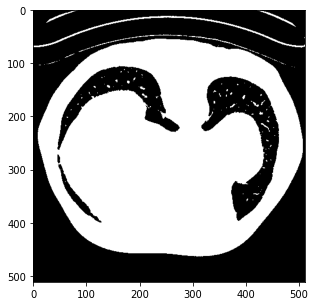

In [8]:
def scan_bin(img):
    _,img_bin = cv2.threshold(img,220,255,cv2.THRESH_BINARY)
    return img_bin

lung_img = norm_slice(ct_img,-650, 700)
img_bin = scan_bin(lung_img)
plt.figure(figsize=(5,5))
plt.imshow(img_bin,'gray')
plt.show()

**2)** Avec votre image binarisée, codez une fonction de détection de contours (ou utilisez en une qui existe dans une certaine librairie connue...). Affichez ensuite l'image avec les contours dessinés. Combien de contours avez-vous trouvé ?

In [9]:
def find_contours(img_bin):
    contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    return contours

Nombre de contours trouvés : 125


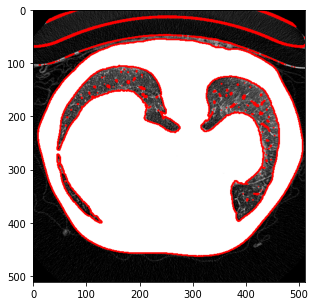

In [10]:
lung_cnts = find_contours(img_bin)
print("Nombre de contours trouvés : {}".format(len(lung_cnts)))

output = cv2.drawContours(cv2.cvtColor(lung_img,cv2.COLOR_GRAY2RGB), lung_cnts, -1, (255,0,0), 2)
plt.figure(figsize=(5,5))
plt.imshow(output,'gray')
plt.show()

**3)** Normalement, si tout est ok, vous devriez avoir beaucoup trop de contours (environ une centaine !). Il va falloir maintenant filtrer les contours, selon des conditions que vous allez définir. Développez donc une fonction de filtrage de ces contours pour ne gardez que les contours concernant les poumons (2, parfois 3 contours). Affichez les contours filtrés sur le scan.

*Note : pour vous aider, n'hésitez pas à aller voir les propriétés qu'ont les contours (pour OpenCV : https://docs.opencv.org/3.4/d1/d32/tutorial_py_contour_properties.html). Avec 2 conditions bien définies, vous devriez réussir pour toutes les images.*

Nombre de contours filtrés : 3


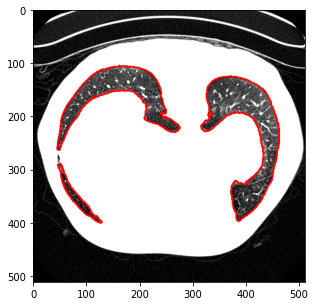

In [32]:
def filter_contours_lung(cnts, img_bin):
    keep_cnts = []
    for cnt in cnts:
        area = cv2.contourArea(cnt)
        mask = np.zeros(img_bin.shape,np.uint8)
        cv2.drawContours(mask,[cnt],0,255,-1)
        mean_val = cv2.mean(img_bin, mask = mask)[0]
        if area > 1000 and mean_val < 127 :
            keep_cnts.append(cnt)
    return keep_cnts

lung_cnts = filter_contours_lung(lung_cnts, img_bin)
print("Nombre de contours filtrés : {}".format(len(lung_cnts)))

output = cv2.drawContours(cv2.cvtColor(lung_img,cv2.COLOR_GRAY2RGB), lung_cnts, -1, (255,0,0), 2)
plt.figure(figsize=(5,5))
plt.imshow(output,'gray')
plt.show()

**4)** Créez maintenant un masque binaire à partir des contours filtrés (une image noire avec les contours remplis en blanc). Vous pourrez également enregistrer l'image et comparer le masque par rapport à l'image originale. La segmentation vous paraît-elle bonne ?

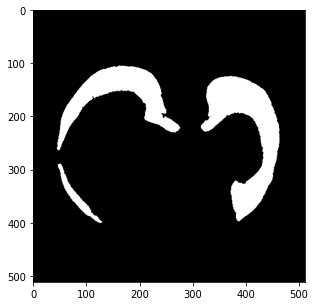

In [12]:
def mask_bin(img, cnts):
    mask = np.zeros_like(img)
    mask = cv2.drawContours(mask, cnts, -1, 255, cv2.FILLED)
    return mask

lung_mask = mask_bin(lung_img, lung_cnts)

plt.figure(figsize=(5,5))
plt.imshow(lung_mask,'gray')
plt.show()

**_Réponse :_** Le résultat est assez satisfaisant !

**5)** Calculez l'aire des poumons (en pixels). Vous pourrez le faire à partir des contours, ou à partir du masque binaire précédemment créé.

In [13]:
print("Aire des poumons : {} pixels".format((lung_mask==255).sum()))

Aire des poumons : 29025 pixels


**6)** Bon, c'est bien beau une aire en pixel, mais dans le domaine métrique, c'est bien mieux ! Ici, les informations des dimensions des pixels se trouvent dans le header du scan original. Voici une fonction qui permet de récupérer les informations qu'on cherche.

In [14]:
def find_pix_dim(ct_img):
    """
    Get the pixdim of the CT image.
    A general solution that get the pixdim indicated from the image
    dimensions. From the last 2 image dimensions we get their pixel dimension.
    Args:
        ct_img: nib image

    Returns: List of the 2 pixel dimensions
    """
    pix_dim = ct_img.header["pixdim"]
    dim = ct_img.header["dim"]
    max_indx = np.argmax(dim)
    pixdimX = pix_dim[max_indx]
    dim = np.delete(dim, max_indx)
    pix_dim = np.delete(pix_dim, max_indx)
    max_indy = np.argmax(dim)
    pixdimY = pix_dim[max_indy]
    return [pixdimX, pixdimY]

print("Dimension d'un pixel du scan : {}".format(", ".join(["{} mm".format(i) for i in find_pix_dim(ct_scan)])))

Dimension d'un pixel du scan : 0.76171875 mm, 0.76171875 mm


Calculez maintenant l'aire des poumons en mm². La mesure vous paraît-elle cohérente ?

In [15]:
dim_pix_x,dim_pix_y = find_pix_dim(ct_scan)
print("Aire des poumons : {:.0f} mm²".format((lung_mask==255).sum()*dim_pix_x*dim_pix_y))

Aire des poumons : 16841 mm²


**_Réponse :_** Une surface de 168 cm², c'est cohérent pour des poumons, donc ça va :D

---

### Segmentation des veines

C'est bon pour les poumons. Mais il nous faut détecter, segmenter et calculer l'aire des veines maintenant ! Ca va être plus compliqué que pour les poumons car elles sont plus difficiles à identifier. Mais si on part du fait qu'on souhaite uniquement segmenter les veines **l'intérieur des poumons**, ça sera en vérité beaucoup plus simple !

**1)** On va considérer qu'un pixel appartient à une veine d'un poumon si :
- il a une valeur supérieure à -500 HU dans le scan original
- il est situé à l'intérieur des poumons (masque binaire créé précedemment)

Développez une fonction pour créer le masque binaire des veines à partir du scan original et du masque des poumons créé précedemment). Que remarquez-vous ?

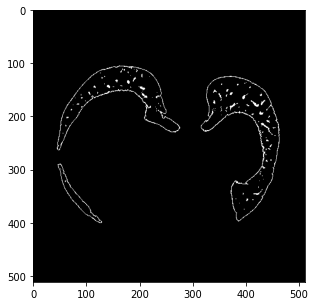

In [16]:
def create_vessel_mask(scan, lung_mask):
    vessel_mask = scan.copy()
    vessel_mask[np.logical_not(lung_mask)] = -1000
    return vessel_mask>=-500

vessel_mask = create_vessel_mask(ct_img, lung_mask)
plt.figure(figsize=(5,5))
plt.imshow(vessel_mask,'gray')
plt.show()

**_Réponse :_** On voit bien les veines, mais également les contours des poumons... qui ne sont pas des veines...

**2)** Normalement, vous devriez constater un léger soucis (il n'y a pas que les veines dans votre masque...). Quelle correction pouvez-vous apporter à votre fonction précédente pour ne garder que les veines ?

*Indice : je vous conseille de modifier légèrement le masque des poumons*

**_Réponse :_** En utilisant de la morphologie mathématique sur le masque de poumons (et plus particulièrement l'érosion), on peut réduire la zone (légèrement) des poumons, ce qui permettrait derrière de ne garder que les veines.

Modifiez votre fonction précédente pour intégrer votre correction. Est-ce que vous avez réussi à ne garder que les veines ?

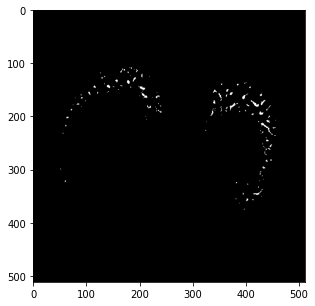

In [17]:
def create_vessel_mask(scan, lung_mask):
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    lung_mask_erode = cv2.erode(lung_mask,kernel)
    vessel_mask = scan.copy() 
    vessel_mask[np.logical_not(lung_mask_erode)] = -1000
    return 255*(vessel_mask>=-500).astype(np.uint8)

vessel_mask = create_vessel_mask(ct_img, lung_mask)
plt.figure(figsize=(5,5))
plt.imshow(vessel_mask,'gray')
plt.show()

**_Réponse :_** C'est beaucoup mieux ! Aucun contour de poumons, et les veines sont encore présentes. Il est possible qu'il y ait des veines qui aient été filtrées, mais vu qu'elles étaient proabablement proches du contour des poumons, on n'est pas 100% sûr que c'étaient des veines.

**3)** Les veines détectées, calculez maintenant l'aire totale des veines en mm²

In [18]:
print("Aire des veines : {:.0f} mm²".format((vessel_mask==255).sum()*dim_pix_x*dim_pix_y))

Aire des veines : 670 mm²


**4)** A partir des aires des veines et des poumons, calculez le rapport entre la surface des vaisseaux et celle des poumons

In [19]:
print("Rapport veines/poumons : {} %".format(100*((vessel_mask==255).sum()/(lung_mask==255).sum())))

Rapport veines/poumons : 3.9793281653746773 %


---

### On regroupe tout !

Vous avez tout développez pour le calcul du rapport entre la surface des vaisseaux et celle des poumons. 

**1)** Pour finir, regroupez tout ce que vous avez développer dans une seule fonction qui calculera le rapport avec en paramètre un seul scan. Vous enregistrez quelque part sur le PC les masques binaires des poumons et vaisseaux créés.

**Important : Commentez votre code svp !!**

In [39]:
def calc_ratio_vessel_lungs(scan, slice_name):
    ct_img = np.flip(scan.get_fdata(),axis=1).T
    lung_img = norm_slice(ct_img,-650, 700)
    lung_bin = scan_bin(lung_img)
    lung_cnts = find_contours(lung_bin)

    lung_cnts = filter_contours_lung(lung_cnts,lung_bin)
    lung_mask = mask_bin(lung_img, lung_cnts)
    
    os.makedirs('./mask_lungs/',exist_ok=True)
    cv2.imwrite('./mask_lungs/{}.png'.format(slice_name),lung_mask)
    
    dim_pix_x, dim_pix_y = find_pix_dim(scan)
    lung_area = (lung_mask==255).sum()*dim_pix_x*dim_pix_y
    
    vessel_mask = create_vessel_mask(ct_img, lung_mask)
    
    os.makedirs('./mask_vessels/',exist_ok=True)
    cv2.imwrite('./mask_vessels/{}.png'.format(slice_name),vessel_mask)
    
    vessel_area = (vessel_mask==255).sum()*dim_pix_x*dim_pix_y
    #print("Aire des veines : {:.0f} mm²".format(vessel_area))
    ratio_vessel_lung = vessel_area/lung_area
    print("Rapport veines/poumons : {:.2f} %".format(100*ratio_vessel_lung))
    return ratio_vessel_lung

**2)** Appliquez votre fonction sur toutes les slices, et récupérez tous les rapports calculés. 

In [40]:
path = './Images/'
files = os.listdir(path)
ratios = {}
for file in files:
    print(file)
    ct_scan = nib.load(path+file)
    ratios[file] = calc_ratio_vessel_lungs(ct_scan,file)

slice001.nii.gz
Rapport veines/poumons : 2.16 %
slice002.nii.gz
Rapport veines/poumons : 3.48 %
slice003.nii.gz
Rapport veines/poumons : 2.21 %
slice004.nii.gz
Rapport veines/poumons : 2.67 %
slice005.nii.gz
Rapport veines/poumons : 2.13 %
slice006.nii.gz
Rapport veines/poumons : 3.01 %
slice007.nii.gz
Rapport veines/poumons : 2.82 %
slice008.nii.gz
Rapport veines/poumons : 3.71 %
slice009.nii.gz
Rapport veines/poumons : 2.13 %
slice010.nii.gz
Rapport veines/poumons : 5.06 %
slice011.nii.gz
Rapport veines/poumons : 3.79 %
slice012.nii.gz
Rapport veines/poumons : 5.65 %
slice013.nii.gz
Rapport veines/poumons : 3.30 %
slice014.nii.gz
Rapport veines/poumons : 2.36 %
slice015.nii.gz
Rapport veines/poumons : 2.49 %
slice016.nii.gz
Rapport veines/poumons : 2.66 %
slice017.nii.gz
Rapport veines/poumons : 3.98 %
slice018.nii.gz
Rapport veines/poumons : 3.31 %
slice019.nii.gz
Rapport veines/poumons : 2.70 %
slice020.nii.gz
Rapport veines/poumons : 5.13 %
slice021.nii.gz
Rapport veines/poumons :

**3)** On va considérer ici qu'il y a une suspicion d'embolie pulmonaire dès qu'on trouve un rapport entre la surface des veines et celle des poumons supérieure ou égale à 5%. Pour quel(s) patient(s) demanderiez-vous des examens supplémentaires ?

In [41]:
print("Slices des patients suspects : {}".format([k.replace('.nii.gz','') for k,v in ratios.items() if v>=0.05]))

Slices des patients suspects : ['slice010', 'slice012', 'slice020', 'slice021']


**_Réponse :_** Les patients à rappeler sont ceux dont les scans correspondent aux slides précédentes.

**4)** Votre diagnostic est-il selon-vous correct ?

*Note : Regardez les résultats de segmentation des poumons et veines pour chaque slice pour guider votre réponse* 

**_Réponse :_** Les résultats visuels de nos algorithmes montrent que ces derniers sont efficaces. Les veines et poumons sont bien segmentés, donc le calcul du ratio dans ce contexte est correct. Maintenant, on calcul un ratio uniquement sur des slices et non un volume 3D global, plus pertinent. De plus, à partir uniquement du calcul d'un ratio, il est quand même difficile de faire un vrai diagnostic. 